# Фонд "Культура"

## Описание проекта

**Постановка задачи:** Паблики в соцсетях являются важным инструментом для продвижения организаций. Чем больше реакций (репостов/лайков/упоминаний) тем выше популярность и узнаваемость. Нужно научиться определять что именно в постах влияет на их популярность. Вам предстоит подготовить датасет, разработать и обучить модель, после чего проанализировать важность ее признаков и их влияние популярность постов. 

**Цель:** Разработать модель предсказания популярности поста и подготовить отчет, в котором будут рекомендации для Заказчика по формированию поста - на что нужно больше всего обращать внимание при его создании, чтобы максимизировать его популярность.

**Исходные данные:** История постов с 10+ пабликов из соцсетей в CSV формате. Ссылка на открытые данные - https://disk.yandex.ru/d/5Y3Zj2SYxPEfgw Информация о пабликах - https://docs.google.com/document/d/1bXknW30wP0ka-_w6GTGZocseT4f7PPLCLlON5s6OWHQ/edit

В данном проекте для решения задачи нужно научиться работать с текстовыми данными. Для этого нужно разобраться:
- как выполняется предобработка текстовых данных (корпуса текстов). Загуглите такие понятия как лемматизация, стемминг, стоп-слова, корпус текстов и словари в задачах обработки текстов.
- что такое токенизация и векторизация, какие способы векторизации подходят нам для решения задачи. Почитайте про методы векторизации - Bag Of Words (BOW), TF-IDF
- какие библиотеки можно/нужно использовать в работе с текстовыми данными, например NLTK, Gensim, SpaCy, pymorphy2. Для работы с русским языком (выделение именнованных сущностей и решение задачи POS-тэгирования (part-of-speech tagging, используется в NLP для определения части речи и грамматических характеристик слов в тексте с приписыванием им соответствующих тегов), ознакомитьcя с библиотекой natasha - https://habr.com/ru/post/516098/


**План работы:**
1. Скачать датасет
2. Провести EDA
3. Попробовать расширить датасет получив информацию из открытых источников (не обязательный шаг, источники - близкие по содержанию к нашему датасету - Культура).
4. Ознакомиться с необходимыми библиотеками и подходами для обработки текстов
5. Подготовить данные для обучения модели
6. Выбрать метрику (будете решать задачу классификации или регрессии)
7. Обучить модель 
8. Оценить качество
9. Повторять п.4-8

## Загрузка данных

Подключение необходимых библиотек

In [1]:
import pandas as pd

Загрузка csv файлов с датасетами

In [2]:
n_s_rnd = pd.read_csv('/Users/kseniia/Desktop/csv/n_s_rnd.csv')

tg_dsplrostov = pd.read_csv('/Users/kseniia/Desktop/csv/tg_dsplrostov.csv')
tg_rostov_gallery = pd.read_csv('/Users/kseniia/Desktop/csv/tg_rostov_gallery.csv')

vk_artbazar_61 = pd.read_csv('/Users/kseniia/Desktop/csv/vk_artbazar_61.csv')
vk_c52space = pd.read_csv('/Users/kseniia/Desktop/csv/vk_c52space.csv')
vk_centr_step = pd.read_csv('/Users/kseniia/Desktop/csv/vk_centr_step.csv')
vk_d30space = pd.read_csv('/Users/kseniia/Desktop/csv/vk_d30space.csv')
vk_dspl_rostov = pd.read_csv('/Users/kseniia/Desktop/csv/vk_dspl_rostov.csv')
vk_makaronka_space = pd.read_csv('/Users/kseniia/Desktop/csv/vk_makaronka_space.csv')
vk_mayak_lektory = pd.read_csv('/Users/kseniia/Desktop/csv/vk_mayak.lektory.csv')
vk_msiid = pd.read_csv('/Users/kseniia/Desktop/csv/vk_msiid.csv')
vk_n_s_rnd = pd.read_csv('/Users/kseniia/Desktop/csv/vk_n_s_rnd.csv')
vk_rostov = pd.read_csv('/Users/kseniia/Desktop/csv/vk_rostov.csv')
vk_sholokhovrostov = pd.read_csv('/Users/kseniia/Desktop/csv/vk_sholokhovrostov.csv')

In [3]:
df_list = [n_s_rnd, tg_dsplrostov, tg_rostov_gallery, vk_artbazar_61, vk_c52space, vk_centr_step, vk_d30space, vk_dspl_rostov, vk_makaronka_space, vk_mayak_lektory, vk_msiid, vk_n_s_rnd, vk_rostov, vk_sholokhovrostov]
df_names = ['n_s_rnd', 'tg_dsplrostov', 'tg_rostov_gallery', 'vk_artbazar_61', 'vk_c52space', 'vk_centr_step', 'vk_d30space', 'vk_dspl_rostov', 'vk_makaronka_space', 'vk_mayak_lektory', 'vk_msiid', 'vk_n_s_rnd', 'vk_rostov', 'vk_sholokhovrostov']

for df_id in range(len(df_list)):
    print()
    print('Название датасета:', df_names[df_id])
    display(df_list[df_id].head(3))
    print(df_list[df_id].info())
    print()


Название датасета: n_s_rnd


,msg_id,sender,sender_id,reply_to_msg_id,date,msg_type,msg_content,has_mention,has_email,has_phone,has_hashtag,is_bot_command
0,3,НИЧЕГО СТРАШНОГО,channel1486494176,-1,2020-11-11 21:12:10,text,Проект “Ничего страшного” состоит из трех част...,0,0,0,0,0
1,4,НИЧЕГО СТРАШНОГО,channel1486494176,-1,2020-11-11 21:20:34,animation,(File not included. Change data exporting sett...,0,0,0,0,0
2,6,НИЧЕГО СТРАШНОГО,channel1486494176,-1,2020-11-12 14:10:20,photo,(File not included. Change data exporting sett...,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   msg_id           853 non-null    int64 
 1   sender           853 non-null    object
 2   sender_id        853 non-null    object
 3   reply_to_msg_id  853 non-null    int64 
 4   date             853 non-null    object
 5   msg_type         853 non-null    object
 6   msg_content      853 non-null    object
 7   has_mention      853 non-null    int64 
 8   has_email        853 non-null    int64 
 9   has_phone        853 non-null    int64 
 10  has_hashtag      853 non-null    int64 
 11  is_bot_command   853 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 80.1+ KB
None


Название датасета: tg_dsplrostov


,msg_id,sender,sender_id,reply_to_msg_id,date,msg_type,msg_content,has_mention,has_email,has_phone,has_hashtag,is_bot_command
0,3,Публичка,channel1698358110,-1,2022-03-01 11:55:15,text,"Дорогие друзья, теперь у нас появился телеграм...",0,0,0,0,0
1,4,Публичка,channel1698358110,-1,2022-03-01 14:00:21,photo,(File not included. Change data exporting sett...,0,0,0,0,0
2,5,Публичка,channel1698358110,-1,2022-03-01 15:56:34,photo,(File not included. Change data exporting sett...,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   msg_id           937 non-null    int64 
 1   sender           937 non-null    object
 2   sender_id        937 non-null    object
 3   reply_to_msg_id  937 non-null    int64 
 4   date             937 non-null    object
 5   msg_type         937 non-null    object
 6   msg_content      937 non-null    object
 7   has_mention      937 non-null    int64 
 8   has_email        937 non-null    int64 
 9   has_phone        937 non-null    int64 
 10  has_hashtag      937 non-null    int64 
 11  is_bot_command   937 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 88.0+ KB
None


Название датасета: tg_rostov_gallery


,msg_id,sender,sender_id,reply_to_msg_id,date,msg_type,msg_content,has_mention,has_email,has_phone,has_hashtag,is_bot_command
0,3,Галерея «Ростов»,channel1394421129,-1,2018-08-09 15:37:13,text,Уже завтра открывается новая экспозиция 10 авг...,0,0,0,0,0
1,4,Галерея «Ростов»,channel1394421129,-1,2018-08-09 15:39:36,photo,(File not included. Change data exporting sett...,0,0,0,0,0
2,10,Галерея «Ростов»,channel1394421129,-1,2018-09-06 14:28:54,photo,(File not included. Change data exporting sett...,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   msg_id           2098 non-null   int64 
 1   sender           2098 non-null   object
 2   sender_id        2098 non-null   object
 3   reply_to_msg_id  2098 non-null   int64 
 4   date             2098 non-null   object
 5   msg_type         2098 non-null   object
 6   msg_content      2098 non-null   object
 7   has_mention      2098 non-null   int64 
 8   has_email        2098 non-null   int64 
 9   has_phone        2098 non-null   int64 
 10  has_hashtag      2098 non-null   int64 
 11  is_bot_command   2098 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 196.8+ KB
None


Название датасета: vk_artbazar_61


,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2022-11-03 11:06:58,"Неудобно листать стену, чтобы найти мероприяти...",1.0,1.0,vk,2,6,2,1575.0,167,1,2022,11,3,11
1,1,2023-02-15 10:42:46,18 февраля в 19-30\n[club8931856|СкитЪ] предст...,0.0,1.0,vk,0,20,9,624.0,1350,1,2023,2,2,10
2,2,2023-02-06 13:41:00,концерт Ильи Соболева\n \n📆 16 февраля в 19:00...,0.0,1.0,vk,0,2,2,372.0,138,1,2023,2,0,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1216 non-null   int64  
 1   date            1216 non-null   object 
 2   text            1049 non-null   object 
 3   is_pinned       1216 non-null   float64
 4   attachments     1216 non-null   float64
 5   post_source     1216 non-null   object 
 6   comments        1216 non-null   int64  
 7   likes           1216 non-null   int64  
 8   reposts         1216 non-null   int64  
 9   views           1216 non-null   float64
 10  len_text        1216 non-null   int64  
 11  post_source_id  1216 non-null   int64  
 12  year            1216 non-null   int64  
 13  month           1216 non-null   int64  
 14  dayofweek       1216 non-null   int64  
 15  hour            1216 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 152.1+ KB
None


Название да

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-02-15 08:23:37,"Дорогие друзья, 16 февраля приглашаем Вас на л...",0,1.0,api,0,4,1.0,420.0,693,0,2023,2,2,8
1,1,2023-02-11 16:34:54,"Друзья, приглашаем Вас на экспозицию автомодел...",0,1.0,vk,0,6,1.0,599.0,317,1,2023,2,5,16
2,2,2023-01-29 20:08:22,"Дорогие друзья, приглашаем вас на лекцию «Фено...",0,1.0,api,0,5,13.0,989.0,679,0,2023,1,6,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2946 non-null   int64  
 1   date            2946 non-null   object 
 2   text            1988 non-null   object 
 3   is_pinned       2946 non-null   int64  
 4   attachments     2946 non-null   float64
 5   post_source     2946 non-null   object 
 6   comments        2946 non-null   int64  
 7   likes           2946 non-null   int64  
 8   reposts         2946 non-null   float64
 9   views           2946 non-null   float64
 10  len_text        2946 non-null   int64  
 11  post_source_id  2946 non-null   int64  
 12  year            2946 non-null   int64  
 13  month           2946 non-null   int64  
 14  dayofweek       2946 non-null   int64  
 15  hour            2946 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 368.4+ KB
None


Название да

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-02-10 13:35:10,| Завтра утренник: история художницы Виктории ...,0,1.0,vk,0,15,4,372,624,1,2023,2,4,13
1,1,2023-02-07 08:26:34,Кинопоказ | Бессметная возлюбленная | 9 феврал...,0,1.0,vk,4,12,1,316,602,1,2023,2,1,8
2,2,2023-02-06 11:46:43,| Цикл авторских лекций Кристины Сасонко (г. С...,0,4.0,vk,0,8,4,294,1444,1,2023,2,0,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      54 non-null     int64  
 1   date            54 non-null     object 
 2   text            51 non-null     object 
 3   is_pinned       54 non-null     int64  
 4   attachments     54 non-null     float64
 5   post_source     54 non-null     object 
 6   comments        54 non-null     int64  
 7   likes           54 non-null     int64  
 8   reposts         54 non-null     int64  
 9   views           54 non-null     int64  
 10  len_text        54 non-null     int64  
 11  post_source_id  54 non-null     int64  
 12  year            54 non-null     int64  
 13  month           54 non-null     int64  
 14  dayofweek       54 non-null     int64  
 15  hour            54 non-null     int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 6.9+ KB
None


Название датасета

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2022-10-10 10:14:08,NaN,1.0,1,vk,1,22,11,1096,0,1,2022,10,0,10
1,1,2022-11-09 16:08:40,"Песни из последних альбомов Родины, Цыганят, К...",0.0,9,vk,0,6,1,144,69,1,2022,11,2,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2 non-null      int64  
 1   date            2 non-null      object 
 2   text            1 non-null      object 
 3   is_pinned       2 non-null      float64
 4   attachments     2 non-null      int64  
 5   post_source     2 non-null      object 
 6   comments        2 non-null      int64  
 7   likes           2 non-null      int64  
 8   reposts         2 non-null      int64  
 9   views           2 non-null      int64  
 10  len_text        2 non-null      int64  
 11  post_source_id  2 non-null      int64  
 12  year            2 non-null      int64  
 13  month           2 non-null      int64  
 14  dayofweek       2 non-null      int64  
 15  hour            2 non-null      int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 384.0+ bytes
None


Название датас

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-02-15 14:57:33,Библиоджаз: Джазовые рассказы,0,1.0,vk,0,2,0,51.0,29,1,2023,2,2,14
1,1,2023-02-15 12:25:00,Концерт 🎶\n\n19 февраля в 16:00 в литературной...,0,1.0,vk,0,4,1,221.0,352,1,2023,2,2,12
2,2,2023-02-15 11:50:41,Встречи\n\n18 февраля в 15:00 в кинозале Донск...,0,1.0,vk,0,9,8,354.0,1788,1,2023,2,2,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5620 non-null   int64  
 1   date            5620 non-null   object 
 2   text            4218 non-null   object 
 3   is_pinned       5620 non-null   int64  
 4   attachments     5620 non-null   float64
 5   post_source     5620 non-null   object 
 6   comments        5620 non-null   int64  
 7   likes           5620 non-null   int64  
 8   reposts         5620 non-null   int64  
 9   views           5620 non-null   float64
 10  len_text        5620 non-null   int64  
 11  post_source_id  5620 non-null   int64  
 12  year            5620 non-null   int64  
 13  month           5620 non-null   int64  
 14  dayofweek       5620 non-null   int64  
 15  hour            5620 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 702.6+ KB
None


Название да

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-01-24 10:46:06,🌊 28 января в 20:00\nМУХА театр перевозит свой...,0,2.0,api,0,14,4,1919.0,448,0,2023,1,1,10
1,1,2023-01-09 10:54:47,"Друзья, мы объявляем о прекращении деятельност...",0,2.0,api,31,115,22,2915.0,1674,0,2023,1,0,10
2,2,2022-12-25 03:44:20,28 и 29 декабря в 20:00 всех ждём на спектакле...,0,3.0,api,0,30,3,2162.0,552,0,2022,12,6,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1525 non-null   int64  
 1   date            1525 non-null   object 
 2   text            1359 non-null   object 
 3   is_pinned       1525 non-null   int64  
 4   attachments     1525 non-null   float64
 5   post_source     1525 non-null   object 
 6   comments        1525 non-null   int64  
 7   likes           1525 non-null   int64  
 8   reposts         1525 non-null   int64  
 9   views           1525 non-null   float64
 10  len_text        1525 non-null   int64  
 11  post_source_id  1525 non-null   int64  
 12  year            1525 non-null   int64  
 13  month           1525 non-null   int64  
 14  dayofweek       1525 non-null   int64  
 15  hour            1525 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 190.8+ KB
None


Название да

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-01-25 17:02:37,"Свежее вдохновляющее расписание, новое место и...",1.0,10.0,api,2,10,6,436,734,0,2023,1,2,17
1,1,2023-02-13 15:54:35,"Друзья, планируем культпоходы вместе 💛 Ниже со...",0.0,1.0,api,0,6,2,233,2429,0,2023,2,0,15
2,2,2023-02-10 16:08:38,"По масштабу, многогранности и сложности личнос...",0.0,1.0,api,0,5,1,223,1264,0,2023,2,4,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      237 non-null    int64  
 1   date            237 non-null    object 
 2   text            205 non-null    object 
 3   is_pinned       237 non-null    float64
 4   attachments     237 non-null    float64
 5   post_source     237 non-null    object 
 6   comments        237 non-null    int64  
 7   likes           237 non-null    int64  
 8   reposts         237 non-null    int64  
 9   views           237 non-null    int64  
 10  len_text        237 non-null    int64  
 11  post_source_id  237 non-null    int64  
 12  year            237 non-null    int64  
 13  month           237 non-null    int64  
 14  dayofweek       237 non-null    int64  
 15  hour            237 non-null    int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 29.8+ KB
None


Название датас

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-02-15 10:03:44,Сегодня 106 лет со дня рождения заслуженного х...,0,1.0,vk,0,6,0,80.0,206,1,2023,2,2,10
1,1,2023-02-14 08:02:57,Сегодня 107 лет со дня рождения таганрогского ...,0,1.0,vk,0,43,2,989.0,205,1,2023,2,1,8
2,2,2023-02-14 07:55:01,Сегодня 100 (!!!) лет со дня рождения ростовск...,0,1.0,vk,0,10,0,134.0,199,1,2023,2,1,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2102 non-null   int64  
 1   date            2102 non-null   object 
 2   text            2007 non-null   object 
 3   is_pinned       2102 non-null   int64  
 4   attachments     2102 non-null   float64
 5   post_source     2102 non-null   object 
 6   comments        2102 non-null   int64  
 7   likes           2102 non-null   int64  
 8   reposts         2102 non-null   int64  
 9   views           2102 non-null   float64
 10  len_text        2102 non-null   int64  
 11  post_source_id  2102 non-null   int64  
 12  year            2102 non-null   int64  
 13  month           2102 non-null   int64  
 14  dayofweek       2102 non-null   int64  
 15  hour            2102 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 262.9+ KB
None


Название да

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-02-03 15:27:07,NaN,0,0.0,vk,0,1,1,87,0,1,2023,2,4,15
1,1,2022-12-15 10:45:28,NaN,0,0.0,vk,0,1,1,141,0,1,2022,12,3,10
2,2,2022-11-23 12:42:35,ПОГУЛЯЕМ ПАРУ ЧАСОВ В СУББОТУ? \n26 ноября в 1...,0,1.0,vk,1,34,10,1210,862,1,2022,11,2,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      206 non-null    int64  
 1   date            206 non-null    object 
 2   text            161 non-null    object 
 3   is_pinned       206 non-null    int64  
 4   attachments     206 non-null    float64
 5   post_source     206 non-null    object 
 6   comments        206 non-null    int64  
 7   likes           206 non-null    int64  
 8   reposts         206 non-null    int64  
 9   views           206 non-null    int64  
 10  len_text        206 non-null    int64  
 11  post_source_id  206 non-null    int64  
 12  year            206 non-null    int64  
 13  month           206 non-null    int64  
 14  dayofweek       206 non-null    int64  
 15  hour            206 non-null    int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 25.9+ KB
None


Название датас

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-02-02 07:59:30,4 февраля в 16:00 у нас начнет работу персонал...,1.0,1.0,api,8,70,32,1750,742,0,2023,2,3,7
1,1,2023-02-15 09:37:00,Автор о проекте «1000 НАТЮРМОРТОВ»: \n«Работая...,0.0,4.0,vk,0,22,5,378,1171,1,2023,2,2,9
2,2,2023-02-11 15:30:25,"«Что хотел сказать автор?» - вопрос, который с...",0.0,2.0,vk,0,26,1,1021,1227,1,2023,2,5,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1257 non-null   int64  
 1   date            1257 non-null   object 
 2   text            859 non-null    object 
 3   is_pinned       1257 non-null   float64
 4   attachments     1257 non-null   float64
 5   post_source     1257 non-null   object 
 6   comments        1257 non-null   int64  
 7   likes           1257 non-null   int64  
 8   reposts         1257 non-null   int64  
 9   views           1257 non-null   int64  
 10  len_text        1257 non-null   int64  
 11  post_source_id  1257 non-null   int64  
 12  year            1257 non-null   int64  
 13  month           1257 non-null   int64  
 14  dayofweek       1257 non-null   int64  
 15  hour            1257 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 157.2+ KB
None


Название да

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2023-02-15 11:10:00,"Друзья, ждем вас на мастер-классы в Шолохов-Це...",0,2.0,vk,0,9,0,166.0,1203,1,2023,2,2,11
1,1,2023-02-11 10:00:01,Приглашаем на выставку «Сталинград глазами Мул...,0,1.0,vk,3,22,4,523.0,1065,1,2023,2,5,10
2,2,2023-02-10 14:15:00,14 февраля приглашаем на лекцию «Неологизмы эп...,0,2.0,api,0,23,6,647.0,751,0,2023,2,4,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      601 non-null    int64  
 1   date            601 non-null    object 
 2   text            504 non-null    object 
 3   is_pinned       601 non-null    int64  
 4   attachments     601 non-null    float64
 5   post_source     601 non-null    object 
 6   comments        601 non-null    int64  
 7   likes           601 non-null    int64  
 8   reposts         601 non-null    int64  
 9   views           601 non-null    float64
 10  len_text        601 non-null    int64  
 11  post_source_id  601 non-null    int64  
 12  year            601 non-null    int64  
 13  month           601 non-null    int64  
 14  dayofweek       601 non-null    int64  
 15  hour            601 non-null    int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 75.2+ KB
None



Первичное изучение загруженных датасетов:

* Датафрейм `n_s_rnd` содержит 12 столбцов с типами данных int64 и object. Явных пропусков в данных нет.

* Датафрейм `tg_dsplrostov` содержит 12 столбцов с типами данных int64 и object. Явных пропусков в данных нет.

* Датафрейм `tg_rostov_gallery` содержит 12 столбцов с типами данных int64 и object. Явных пропусков в данных нет.

* Датафрейм `vk_artbazar_61` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_c52space` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_centr_step` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_d30space` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_dspl_rostov` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_makaronka_space` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_mayak_lektory` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_msiid` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_n_s_rnd` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_rostov` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

* Датафрейм `vk_sholokhovrostov` содержит 16 столбцов с типами данных int64, float64 и object. В колонке text имеются явные пропуски.

## Первичная обработка данных

Объединим датасеты по источникам:

In [4]:
df_vk = pd.concat((vk_artbazar_61, vk_c52space, vk_centr_step, vk_d30space, vk_dspl_rostov, vk_makaronka_space, vk_mayak_lektory, vk_msiid, vk_n_s_rnd, vk_rostov, vk_sholokhovrostov), axis=0)

In [5]:
display(df_vk.head())

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2022-11-03 11:06:58,"Неудобно листать стену, чтобы найти мероприяти...",1.0,1.0,vk,2,6,2.0,1575.0,167,1,2022,11,3,11
1,1,2023-02-15 10:42:46,18 февраля в 19-30\n[club8931856|СкитЪ] предст...,0.0,1.0,vk,0,20,9.0,624.0,1350,1,2023,2,2,10
2,2,2023-02-06 13:41:00,концерт Ильи Соболева\n \n📆 16 февраля в 19:00...,0.0,1.0,vk,0,2,2.0,372.0,138,1,2023,2,0,13
3,3,2023-02-06 12:41:00,День Дурака\n \n📆 14 Февраля в 19:00 \n🚩 Конгр...,0.0,1.0,vk,0,1,1.0,473.0,1055,1,2023,2,0,12
4,4,2023-02-06 11:41:00,Большой концерт Ани Лорак «THE BEST» \n\n📆 26 ...,0.0,1.0,vk,0,1,1.0,291.0,908,1,2023,2,0,11


In [6]:
df_vk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15766 entries, 0 to 600
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      15766 non-null  int64  
 1   date            15766 non-null  object 
 2   text            12402 non-null  object 
 3   is_pinned       15766 non-null  float64
 4   attachments     15766 non-null  float64
 5   post_source     15766 non-null  object 
 6   comments        15766 non-null  int64  
 7   likes           15766 non-null  int64  
 8   reposts         15766 non-null  float64
 9   views           15766 non-null  float64
 10  len_text        15766 non-null  int64  
 11  post_source_id  15766 non-null  int64  
 12  year            15766 non-null  int64  
 13  month           15766 non-null  int64  
 14  dayofweek       15766 non-null  int64  
 15  hour            15766 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 2.0+ MB


Удалим `Unnamed: 0`, т.к. похоже что он отображает индексы при выгрузке исходных таблиц, а значит не несет никакой смысловой нагрузки для исследования данных:

In [7]:
df_vk = df_vk.drop(['Unnamed: 0'], axis=1)
print(df_vk.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15766 entries, 0 to 600
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            15766 non-null  object 
 1   text            12402 non-null  object 
 2   is_pinned       15766 non-null  float64
 3   attachments     15766 non-null  float64
 4   post_source     15766 non-null  object 
 5   comments        15766 non-null  int64  
 6   likes           15766 non-null  int64  
 7   reposts         15766 non-null  float64
 8   views           15766 non-null  float64
 9   len_text        15766 non-null  int64  
 10  post_source_id  15766 non-null  int64  
 11  year            15766 non-null  int64  
 12  month           15766 non-null  int64  
 13  dayofweek       15766 non-null  int64  
 14  hour            15766 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.9+ MB
None


In [8]:
df_tg = pd.concat((tg_dsplrostov, tg_rostov_gallery), axis=0)
display(df_tg.head())

,msg_id,sender,sender_id,reply_to_msg_id,date,msg_type,msg_content,has_mention,has_email,has_phone,has_hashtag,is_bot_command
0,3,Публичка,channel1698358110,-1,2022-03-01 11:55:15,text,"Дорогие друзья, теперь у нас появился телеграм...",0,0,0,0,0
1,4,Публичка,channel1698358110,-1,2022-03-01 14:00:21,photo,(File not included. Change data exporting sett...,0,0,0,0,0
2,5,Публичка,channel1698358110,-1,2022-03-01 15:56:34,photo,(File not included. Change data exporting sett...,0,0,0,0,0
3,6,Публичка,channel1698358110,-1,2022-03-01 15:56:34,photo,(File not included. Change data exporting sett...,0,0,0,0,0
4,7,Публичка,channel1698358110,-1,2022-03-01 16:00:46,text,"❗Не забываем, что при посещении библиотеки нео...",0,0,0,0,0


In [9]:
print(df_tg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3035 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   msg_id           3035 non-null   int64 
 1   sender           3035 non-null   object
 2   sender_id        3035 non-null   object
 3   reply_to_msg_id  3035 non-null   int64 
 4   date             3035 non-null   object
 5   msg_type         3035 non-null   object
 6   msg_content      3035 non-null   object
 7   has_mention      3035 non-null   int64 
 8   has_email        3035 non-null   int64 
 9   has_phone        3035 non-null   int64 
 10  has_hashtag      3035 non-null   int64 
 11  is_bot_command   3035 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 308.2+ KB
None


In [10]:
display(n_s_rnd.head())

,msg_id,sender,sender_id,reply_to_msg_id,date,msg_type,msg_content,has_mention,has_email,has_phone,has_hashtag,is_bot_command
0,3,НИЧЕГО СТРАШНОГО,channel1486494176,-1,2020-11-11 21:12:10,text,Проект “Ничего страшного” состоит из трех част...,0,0,0,0,0
1,4,НИЧЕГО СТРАШНОГО,channel1486494176,-1,2020-11-11 21:20:34,animation,(File not included. Change data exporting sett...,0,0,0,0,0
2,6,НИЧЕГО СТРАШНОГО,channel1486494176,-1,2020-11-12 14:10:20,photo,(File not included. Change data exporting sett...,0,0,0,0,0
3,7,НИЧЕГО СТРАШНОГО,channel1486494176,-1,2020-11-12 14:10:21,photo,(File not included. Change data exporting sett...,0,0,0,0,0
4,8,НИЧЕГО СТРАШНОГО,channel1486494176,-1,2020-11-12 14:10:21,photo,(File not included. Change data exporting sett...,0,0,0,0,0


Датасет `n_s_rnd`, вероятнее всего, относится к Telegram, но это требует уточнения. До выяснения использование датасета приостановлено.

## Обработка пропусков

### Обработка пропусков  таблицы df_vk

Таблица df_vk содержит пропуски в данных, изучим их

In [11]:
display(df_vk[df_vk['text'].isna()==True].head())

,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
106,2022-12-25 07:45:58,NaN,0.0,0.0,vk,0,3,0.0,230.0,0,1,2022,12,6,7
168,2022-12-05 09:42:00,NaN,0.0,0.0,vk,0,2,0.0,128.0,0,1,2022,12,0,9
227,2022-11-12 18:20:31,NaN,0.0,0.0,api,0,2,0.0,286.0,0,0,2022,11,5,18
317,2022-10-25 21:45:59,NaN,0.0,0.0,api,0,3,0.0,219.0,0,0,2022,10,1,21
345,2022-10-19 06:53:00,NaN,0.0,0.0,vk,0,3,0.0,247.0,0,1,2022,10,2,6


Имеются пропуски в столбце text. Не всегда публикации содержат текст, но публи кация с отсутствующим текстом также может быть популяна (например, текст может содержаться неявно в изображении), поэтому данные строки в таком количестве около 3000 можно оставить, заполнив пропуски. Заполню словосочетанием, означающим, что данный пост не содержит явного текста.

In [12]:
df_vk = df_vk.fillna('PostWithoutText')

In [13]:
df_vk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15766 entries, 0 to 600
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            15766 non-null  object 
 1   text            15766 non-null  object 
 2   is_pinned       15766 non-null  float64
 3   attachments     15766 non-null  float64
 4   post_source     15766 non-null  object 
 5   comments        15766 non-null  int64  
 6   likes           15766 non-null  int64  
 7   reposts         15766 non-null  float64
 8   views           15766 non-null  float64
 9   len_text        15766 non-null  int64  
 10  post_source_id  15766 non-null  int64  
 11  year            15766 non-null  int64  
 12  month           15766 non-null  int64  
 13  dayofweek       15766 non-null  int64  
 14  hour            15766 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.9+ MB


Пропуски заполнены.

### Обработка пропусков  таблицы df_tg

In [14]:
for column in df_tg.columns:
    print(str(column), df_tg[column].isna().sum())

msg_id 0
sender 0
sender_id 0
reply_to_msg_id 0
date 0
msg_type 0
msg_content 0
has_mention 0
has_email 0
has_phone 0
has_hashtag 0
is_bot_command 0


In [15]:
for column in df_tg.columns:
    print(str(column), df_tg[column].isnull().sum())

msg_id 0
sender 0
sender_id 0
reply_to_msg_id 0
date 0
msg_type 0
msg_content 0
has_mention 0
has_email 0
has_phone 0
has_hashtag 0
is_bot_command 0


Явных пропусков не обнаружено

### Обработка дубликатов

**Поиск явных дубликатов**

In [16]:
print(df_vk.duplicated(keep=False).sum())

2


In [17]:
display(df_vk[df_vk.duplicated(keep=False)==True])

,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
99,2022-05-19 16:00:48,"Couple of creators ""Жизнь всегда происходит се...",0.0,3.0,api,1,18,3.0,401.0,1004,0,2022,5,3,16
100,2022-05-19 16:00:48,"Couple of creators ""Жизнь всегда происходит се...",0.0,3.0,api,1,18,3.0,401.0,1004,0,2022,5,3,16


В данных присутствует один явный дубликат. Выборка огромная, его можно проигнорировать)

**Поиск неявных дубликатов**

In [18]:
print(df_vk['text'].duplicated().sum())

3750


Имеется 387 текстовых дубликатов. Спам?:) Исследуем:

In [19]:
display(df_vk[(df_vk['text'].duplicated(keep=False)==True) & (df_vk['text'] != 'PostWithoutText')])

,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
22,2023-02-01 16:33:00,Анонсы событий для детей и всей семьи тут: \n[...,0.0,1.0,vk,0,3,0.0,410.0,151,1,2023,2,2,16
39,2023-01-28 15:33:00,Анонсы событий для детей и всей семьи тут: \n[...,0.0,1.0,vk,0,3,0.0,434.0,151,1,2023,1,5,15
56,2023-01-20 13:33:00,Анонсы событий для детей и всей семьи тут: \n[...,0.0,1.0,vk,0,2,0.0,353.0,151,1,2023,1,4,13
67,2023-01-16 12:33:00,Анонсы событий для детей и всей семьи тут: \n[...,0.0,1.0,vk,0,3,0.0,412.0,151,1,2023,1,0,12
77,2023-01-12 11:33:00,Анонсы событий для детей и всей семьи тут: \n[...,0.0,1.0,vk,0,2,0.0,345.0,151,1,2023,1,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2017-10-23 07:49:51,"""Шолохов - Центр"" приглашает на музейное интер...",0.0,2.0,vk,0,8,0.0,208.0,946,1,2017,10,0,7
499,2017-10-20 07:55:50,"📢«Театр в музее»📢 \nВ рамках проекта ""Театр в ...",0.0,1.0,vk,0,5,2.0,239.0,219,1,2017,10,4,7
504,2017-10-16 07:42:32,"""Шолохов - Центр"" приглашает на музейное интер...",0.0,2.0,vk,0,15,1.0,431.0,946,1,2017,10,0,7
505,2017-10-13 19:55:35,"📢«Театр в музее»📢 \nВ рамках проекта ""Театр в ...",0.0,1.0,vk,0,8,0.0,232.0,219,1,2017,10,4,19


После исключения заполненных пропусков осталось 513 повторяющихся текстов. При беглом взгляде похоже на рекламу, изучу уникальные данные поближе. Но потом)

## Исследовательский анализ данных

### Исследование количественных данных

In [20]:
columns = ['msg_id', 'reply_to_msg_id', 'has_mention', 'has_email', 'has_phone', 'has_hashtag', 'is_bot_command']

In [21]:
for column in columns:
    print('Встречаемость уникальных значений в', column)
    print(df_tg[column].value_counts())
    print()

Встречаемость уникальных значений в msg_id
msg_id
3       2
648     2
650     2
651     2
652     2
       ..
1344    1
1343    1
1342    1
1341    1
2240    1
Name: count, Length: 2134, dtype: int64

Встречаемость уникальных значений в reply_to_msg_id
reply_to_msg_id
-1       2960
 1892       2
 2093       2
 975        1
 968        1
         ... 
 717        1
 700        1
 550        1
 637        1
 2126       1
Name: count, Length: 74, dtype: int64

Встречаемость уникальных значений в has_mention
has_mention
0    2964
1      71
Name: count, dtype: int64

Встречаемость уникальных значений в has_email
has_email
0    3025
1      10
Name: count, dtype: int64

Встречаемость уникальных значений в has_phone
has_phone
0    3032
1       3
Name: count, dtype: int64

Встречаемость уникальных значений в has_hashtag
has_hashtag
0    2946
1      89
Name: count, dtype: int64

Встречаемость уникальных значений в is_bot_command
is_bot_command
0    3035
Name: count, dtype: int64



Обнаружено странное значение в столбце `reply_to_msg_id`: -1. Пока не ясно, как это интерпретировать. Возможно, это означает отсутсвие ответа, но это необходимо уточнять. Само предназначение данного признака на данный момент невозможно однозначно интерпретировать. В дальнейшем использование датасета `df_tg` приостаовлено до уточнения данных.

In [22]:
columns = ['is_pinned', 'attachments', 'comments', 'likes', 'reposts', 'views', 'len_text', 'post_source_id', 'year', 'month', 'dayofweek', 'hour']

### Исследование корелляции признаков

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df_vk.head(3)

,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,2022-11-03 11:06:58,"Неудобно листать стену, чтобы найти мероприяти...",1.0,1.0,vk,2,6,2.0,1575.0,167,1,2022,11,3,11
1,2023-02-15 10:42:46,18 февраля в 19-30\n[club8931856|СкитЪ] предст...,0.0,1.0,vk,0,20,9.0,624.0,1350,1,2023,2,2,10
2,2023-02-06 13:41:00,концерт Ильи Соболева\n \n📆 16 февраля в 19:00...,0.0,1.0,vk,0,2,2.0,372.0,138,1,2023,2,0,13


/Users/kseniia/miniconda3/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

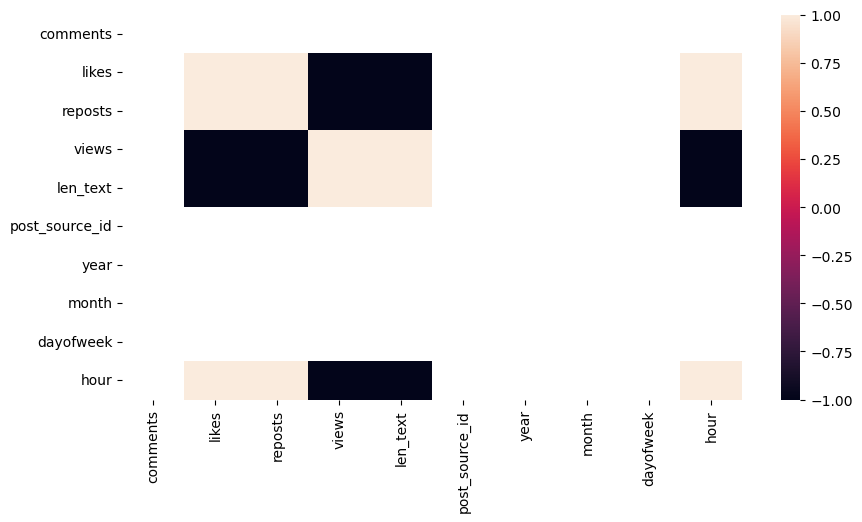

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
df_nums = df_vk.iloc[2:4, 5:]
sns.heatmap(df_nums.corr(), annot = True)

Имеется умеренная положительная корелляция между признаками `likes` и `reposts`, но не достаточная, чтобы говорить однозначно о взаимосвязию, а также умеренная корелляция между `views` и и `reposts`. Также замечена некоторая взаимосвязь между просмотрами и годом публикации, а также годом и длинной текста.

## Предварительная обработка текстовых данных

In [26]:
!pip install nltk

In [27]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kseniia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kseniia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kseniia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
stop_words = stopwords.words('russian')

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
from nltk.stem import SnowballStemmer 
print(" ".join(SnowballStemmer.languages)) 

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [31]:
stemmer = SnowballStemmer("russian")

In [32]:
display(df_vk.head(5))

,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,2022-11-03 11:06:58,"Неудобно листать стену, чтобы найти мероприяти...",1.0,1.0,vk,2,6,2.0,1575.0,167,1,2022,11,3,11
1,2023-02-15 10:42:46,18 февраля в 19-30\n[club8931856|СкитЪ] предст...,0.0,1.0,vk,0,20,9.0,624.0,1350,1,2023,2,2,10
2,2023-02-06 13:41:00,концерт Ильи Соболева\n \n📆 16 февраля в 19:00...,0.0,1.0,vk,0,2,2.0,372.0,138,1,2023,2,0,13
3,2023-02-06 12:41:00,День Дурака\n \n📆 14 Февраля в 19:00 \n🚩 Конгр...,0.0,1.0,vk,0,1,1.0,473.0,1055,1,2023,2,0,12
4,2023-02-06 11:41:00,Большой концерт Ани Лорак «THE BEST» \n\n📆 26 ...,0.0,1.0,vk,0,1,1.0,291.0,908,1,2023,2,0,11


### Добавление дополнительных признаков с информацией о тексте

In [33]:
! pip install emoji --upgrade

In [34]:
import emoji
emoji.emoji_count

def count_dots(row):
    return row.count('.')

def count_hashes(row):
    return row.count('#')

def count_comma(row):
    return row.count(',')

def count_smiles(row):
    return emoji.emoji_count(row)

def count_https(row):
    return row.count('https://')

def count_paragraphs(row):
    return row.count('/n')

def count_exclamation(row):
    return row.count('!')

def count_questions(row):
    return row.count('?')

df_vk['n_dots'] = df_vk['text'].apply(count_dots)
df_vk['n_hash'] = df_vk['text'].apply(count_hashes)
df_vk['n_comma'] = df_vk['text'].apply(count_comma)
df_vk['n_exclamation'] = df_vk['text'].apply(count_exclamation)
df_vk['n_questions'] = df_vk['text'].apply(count_questions)
df_vk['n_smiles'] = df_vk['text'].apply(count_smiles)
df_vk['n_https'] = df_vk['text'].apply(count_https)
df_vk['n_paragraphs'] = df_vk['text'].apply(count_paragraphs)

In [35]:
for i in range(10):
    print(df_vk.iloc[i, 1])

Неудобно листать стену, чтобы найти мероприятие на конкретную дату?

Афиша всех опубликованных мероприятий по датам в обсуждении
https://vk.com/topic-23746107_49180355
18 февраля в 19-30
[club8931856|СкитЪ] представит свою полную программу. 
В концерте так же примут участие наши друзья [id99262820|Вячеслав Захаров] - Человек-Трава и [id3245231|Наталья Верба] - танцы. 
 
Солнце и морской ветер на раскопках древнегреческого города Танаис, Ростовские подворотни и бескрайние Донские степи, Южный колорит и высокие традиции "Заозёрной школы поэзии"— всё это СкитЪ, 
известная арт-фолк-рок группа из Ростова-на-Дону! 
Участники и лауреаты ряда всероссийских и международных фестивалей авторской песни. 
 
Вячеслав Захаров - Человек-Трава - 
мультиинструменталист, гость прогрессивных фестивалей, 
персонаж с гитарой, менестрель, путешественник и созерцатель. 
«Не массовая музыка. Акустическая психоделия, штучный вариант, музыка высшей пробы... Чтобы эти вещи понимать, нужна работа сознания. Эта муз

In [149]:
display(df_vk.head(30))

,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,...,dayofweek,hour,n_dots,n_hash,n_comma,n_exclamation,n_questions,n_smiles,n_https,n_paragraphs
0,2022-11-03 11:06:58,"Неудобно листать стену, чтобы найти мероприяти...",1.0,1.0,vk,2,6,2.0,1575.0,167,...,3,11,1,0,1,0,1,0,1,0
1,2023-02-15 10:42:46,18 февраля в 19-30\n[club8931856|СкитЪ] предст...,0.0,1.0,vk,0,20,9.0,624.0,1350,...,2,10,14,0,21,3,0,0,0,0
2,2023-02-06 13:41:00,концерт Ильи Соболева\n \n📆 16 февраля в 19:00...,0.0,1.0,vk,0,2,2.0,372.0,138,...,0,13,2,0,0,0,0,4,1,0
3,2023-02-06 12:41:00,День Дурака\n \n📆 14 Февраля в 19:00 \n🚩 Конгр...,0.0,1.0,vk,0,1,1.0,473.0,1055,...,0,12,11,0,10,3,1,4,1,0
4,2023-02-06 11:41:00,Большой концерт Ани Лорак «THE BEST» \n\n📆 26 ...,0.0,1.0,vk,0,1,1.0,291.0,908,...,0,11,3,0,12,3,0,4,1,0
5,2023-02-06 10:41:00,Концептуальная АРТ-ВЕЧЕРИНКА или\nприглашение ...,0.0,1.0,vk,0,3,2.0,253.0,588,...,0,10,1,0,0,0,1,0,0,0
6,2023-02-06 09:41:00,Александр Малинин\n \n📆 08 Марта в 19:00 \n🚩 К...,0.0,1.0,vk,0,2,0.0,249.0,711,...,0,9,5,0,10,0,0,4,1,0
7,2023-02-06 08:41:00,7 февраля в 16:00 в отделе искусств [club11891...,0.0,6.0,vk,0,3,1.0,229.0,1021,...,0,8,18,0,15,0,0,0,0,0
8,2023-02-06 07:41:00,"Спектакь ""РаскольникOFF""\n\n📆 06 февраля в 19:...",0.0,8.0,vk,0,2,0.0,311.0,1201,...,0,7,8,0,15,0,1,3,0,0
9,2023-02-06 06:41:00,🚉 Передвижная выставка-музей «Поезд Победы» по...,0.0,1.0,vk,0,3,6.0,891.0,361,...,0,6,4,0,3,0,0,2,0,0


In [150]:
import re

def text_without_symbols(row):
    
    row = re.split(r'[`\-=~!@$%^&*()_+\[\]{};\'\\:"|<,./<>?«»]', row)
    row = ''.join(row)
    row = re.split(r'\s', row)
    for word in row:
        to_exept = '`\-=~!@$%^&*()_+\[\]{};\'\\:"|<,./<>?«»'
        to_exept = re.split(r'', to_exept)
        if word in to_exept:
            row.remove(word)
    row = ' '.join(row)
    return row


df_vk['text'] = df_vk['text'].apply(text_without_symbols)
display(df_vk['text'].head())


0    Неудобно листать стену чтобы найти мероприятие...
1    18 февраля в 1930 club8931856СкитЪ представит ...
2    концерт Ильи Соболева 📆 16 февраля в 1900 🚩 Пе...
3    День Дурака 📆 14 Февраля в 1900 🚩 Конгрессхолл...
4    Большой концерт Ани Лорак THE BEST 📆 26 Апреля...
Name: text, dtype: object

In [151]:
df_vk['text'] = df_vk['text'].str.lower()
display(df_vk['text'].head())

0    неудобно листать стену чтобы найти мероприятие...
1    18 февраля в 1930 club8931856скитъ представит ...
2    концерт ильи соболева 📆 16 февраля в 1900 🚩 пе...
3    день дурака 📆 14 февраля в 1900 🚩 конгрессхолл...
4    большой концерт ани лорак the best 📆 26 апреля...
Name: text, dtype: object

In [152]:
import nltk 
from nltk import word_tokenize
from nltk.util import ngrams

## Подготовка данных к обучению моделей

#### Нормализация таргетов, объединение таргетов в один

In [153]:
print(df_vk.columns)

Index(['date', 'text', 'is_pinned', 'attachments', 'post_source', 'comments',
       'likes', 'reposts', 'views', 'len_text', 'post_source_id', 'year',
       'month', 'dayofweek', 'hour', 'n_dots', 'n_hash', 'n_comma',
       'n_exclamation', 'n_questions', 'n_smiles', 'n_https', 'n_paragraphs'],
      dtype='object')


In [154]:
# создание единого таргета из списка таргетов
# нормализация всех таргетов
proto_targets = df_vk[['likes', 'is_pinned', 'comments', 'reposts', 'views']]
proto_targets[['views']] = proto_targets[['views']] + 1

from sklearn import preprocessing
import numpy as np

normalized_targets = pd.DataFrame()


proto_targets = proto_targets / proto_targets.sum(axis=0)
targets = proto_targets.sum(axis=1)
    
display("proto_targets:", proto_targets)
display("targets:", targets)
print(type(targets))

df_vk = pd.concat((df_vk, targets), axis=1)
display(df_vk)
df_vk = df_vk.rename(columns = {0 : 'target'})
display(df_vk.columns)

print()

/var/folders/n_/l3svxj8n1x7bfll43j88bsb80000gn/T/ipykernel_94474/3151950840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proto_targets[['views']] = proto_targets[['views']] + 1


'proto_targets:'

,likes,is_pinned,comments,reposts,views
0,0.000035,0.25,0.000337,0.000078,2.152852e-04
1,0.000118,0.00,0.000000,0.000349,8.537641e-05
2,0.000012,0.00,0.000000,0.000078,5.095264e-05
3,0.000006,0.00,0.000000,0.000039,6.474947e-05
4,0.000006,0.00,0.000000,0.000039,3.988786e-05
...,...,...,...,...,...
596,0.000024,0.00,0.000000,0.000000,1.366023e-07
597,0.000012,0.00,0.000000,0.000000,1.366023e-07
598,0.000012,0.00,0.000000,0.000000,1.366023e-07
599,0.000012,0.00,0.000000,0.000000,1.366023e-07


'targets:'

0      0.250666
1      0.000552
2      0.000140
3      0.000109
4      0.000085
         ...   
596    0.000024
597    0.000012
598    0.000012
599    0.000012
600    0.000047
Length: 15766, dtype: float64

<class 'pandas.core.series.Series'>


,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,...,hour,n_dots,n_hash,n_comma,n_exclamation,n_questions,n_smiles,n_https,n_paragraphs,0
0,2022-11-03 11:06:58,неудобно листать стену чтобы найти мероприятие...,1.0,1.0,vk,2,6,2.0,1575.0,167,...,11,1,0,1,0,1,0,1,0,0.250666
1,2023-02-15 10:42:46,18 февраля в 1930 club8931856скитъ представит ...,0.0,1.0,vk,0,20,9.0,624.0,1350,...,10,14,0,21,3,0,0,0,0,0.000552
2,2023-02-06 13:41:00,концерт ильи соболева 📆 16 февраля в 1900 🚩 пе...,0.0,1.0,vk,0,2,2.0,372.0,138,...,13,2,0,0,0,0,4,1,0,0.000140
3,2023-02-06 12:41:00,день дурака 📆 14 февраля в 1900 🚩 конгрессхолл...,0.0,1.0,vk,0,1,1.0,473.0,1055,...,12,11,0,10,3,1,4,1,0,0.000109
4,2023-02-06 11:41:00,большой концерт ани лорак the best 📆 26 апреля...,0.0,1.0,vk,0,1,1.0,291.0,908,...,11,3,0,12,3,0,4,1,0,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,2016-01-20 11:49:12,30 сентября 4 декабря тут был я счастлив госуд...,0.0,2.0,vk,0,4,0.0,0.0,955,...,11,20,0,6,0,0,0,0,0,0.000024
597,2016-01-20 11:47:33,16 декабря 2016 28 февраля 2017 года гимн росс...,0.0,3.0,vk,0,2,0.0,0.0,927,...,11,16,0,7,0,0,0,0,0,0.000012
598,2016-01-14 13:05:22,почувствуйте себя настоящими кондитерами и ощу...,0.0,6.0,vk,0,2,0.0,0.0,223,...,13,2,0,1,2,0,0,0,1,0.000012
599,2016-01-14 12:39:52,приглашаем посетить выставку рождественские ис...,0.0,3.0,vk,0,2,0.0,0.0,53,...,12,0,0,0,0,0,0,0,0,0.000012


Index(['date', 'text', 'is_pinned', 'attachments', 'post_source', 'comments',
       'likes', 'reposts', 'views', 'len_text', 'post_source_id', 'year',
       'month', 'dayofweek', 'hour', 'n_dots', 'n_hash', 'n_comma',
       'n_exclamation', 'n_questions', 'n_smiles', 'n_https', 'n_paragraphs',
       'target'],
      dtype='object')

In [155]:
display(df_vk.head())

,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,...,hour,n_dots,n_hash,n_comma,n_exclamation,n_questions,n_smiles,n_https,n_paragraphs,target
0,2022-11-03 11:06:58,неудобно листать стену чтобы найти мероприятие...,1.0,1.0,vk,2,6,2.0,1575.0,167,...,11,1,0,1,0,1,0,1,0,0.250666
1,2023-02-15 10:42:46,18 февраля в 1930 club8931856скитъ представит ...,0.0,1.0,vk,0,20,9.0,624.0,1350,...,10,14,0,21,3,0,0,0,0,0.000552
2,2023-02-06 13:41:00,концерт ильи соболева 📆 16 февраля в 1900 🚩 пе...,0.0,1.0,vk,0,2,2.0,372.0,138,...,13,2,0,0,0,0,4,1,0,0.000140
3,2023-02-06 12:41:00,день дурака 📆 14 февраля в 1900 🚩 конгрессхолл...,0.0,1.0,vk,0,1,1.0,473.0,1055,...,12,11,0,10,3,1,4,1,0,0.000109
4,2023-02-06 11:41:00,большой концерт ани лорак the best 📆 26 апреля...,0.0,1.0,vk,0,1,1.0,291.0,908,...,11,3,0,12,3,0,4,1,0,0.000085


#### Логарифмизация таргета

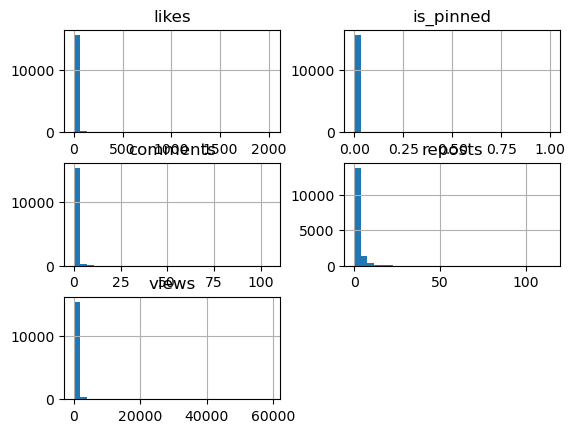

In [156]:
hist = df_vk[['likes', 'is_pinned', 'comments', 'reposts', 'views']].hist(bins=30)

Распределение каждого нелогарифмизованного таргета похоже на пуассоновское -имеется сдвиг влево. 

Axes(0.125,0.11;0.775x0.77)


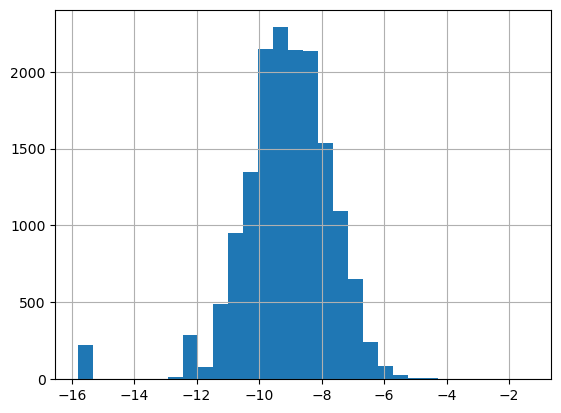

In [157]:
hist = np.log(df_vk['target']).hist(bins=30)

print(hist)

Распределение логарифмизованного общего таргета похоже на нормальное.

In [158]:
df_vk['target'] = np.log(df_vk['target'])

#### Разбиение данных на тестовые и тренировочные

In [159]:
from sklearn.model_selection import train_test_split

data = df_vk.copy()
y = data[['target']].values
data.drop(['likes', 'date', 'post_source', 'is_pinned', 'comments', 'reposts', 'views', 'target'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, shuffle=True) #, stratify=y)

display(data)
print()
display(y)

display(X_train.head())

,text,attachments,len_text,post_source_id,year,month,dayofweek,hour,n_dots,n_hash,n_comma,n_exclamation,n_questions,n_smiles,n_https,n_paragraphs
0,неудобно листать стену чтобы найти мероприятие...,1.0,167,1,2022,11,3,11,1,0,1,0,1,0,1,0
1,18 февраля в 1930 club8931856скитъ представит ...,1.0,1350,1,2023,2,2,10,14,0,21,3,0,0,0,0
2,концерт ильи соболева 📆 16 февраля в 1900 🚩 пе...,1.0,138,1,2023,2,0,13,2,0,0,0,0,4,1,0
3,день дурака 📆 14 февраля в 1900 🚩 конгрессхолл...,1.0,1055,1,2023,2,0,12,11,0,10,3,1,4,1,0
4,большой концерт ани лорак the best 📆 26 апреля...,1.0,908,1,2023,2,0,11,3,0,12,3,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,30 сентября 4 декабря тут был я счастлив госуд...,2.0,955,1,2016,1,2,11,20,0,6,0,0,0,0,0
597,16 декабря 2016 28 февраля 2017 года гимн росс...,3.0,927,1,2016,1,2,11,16,0,7,0,0,0,0,0
598,почувствуйте себя настоящими кондитерами и ощу...,6.0,223,1,2016,1,3,13,2,0,1,2,0,0,0,1
599,приглашаем посетить выставку рождественские ис...,3.0,53,1,2016,1,3,12,0,0,0,0,0,0,0,0


array([[ -1.38363482],
       [ -7.50110895],
       [ -8.87164901],
       ...,
       [-11.33464904],
       [-11.33464904],
       [ -9.95696388]])

,text,attachments,len_text,post_source_id,year,month,dayofweek,hour,n_dots,n_hash,n_comma,n_exclamation,n_questions,n_smiles,n_https,n_paragraphs
1006,донская государственная публичная библиотека п...,1.0,695,1,2022,4,5,8,5,0,5,0,3,0,0,0
242,❤️ выходные — самое лучшее время чтобы провест...,1.0,849,0,2020,9,3,11,3,0,9,1,0,9,0,0
3049,в #донскойпубличнойбиблиотеке прошел праздник ...,10.0,69,1,2020,3,0,4,0,1,0,0,0,0,0,0
2787,видеоматериал ростов на тв таким город вы еще ...,0.0,139,1,2012,1,3,13,3,0,0,1,1,0,0,0
1491,образовательная программа в рамках года герман...,1.0,57,1,2012,11,0,11,0,0,0,0,0,0,0,0


In [160]:
display(y_train)

array([[-7.18873837],
       [-8.75784948],
       [-8.00707459],
       ...,
       [-8.97454005],
       [-8.68623645],
       [-9.97286912]])

In [161]:
display(X_test.head())

,text,attachments,len_text,post_source_id,year,month,dayofweek,hour,n_dots,n_hash,n_comma,n_exclamation,n_questions,n_smiles,n_https,n_paragraphs
398,дорогие друзья совсем скоро 19 мая ночь в музе...,1.0,75,1,2018,4,6,12,2,0,0,9,0,0,0,0
1246,самый известный фотопортрет тимофея теряева и ...,1.0,176,1,2019,8,2,9,2,0,2,0,0,0,0,0
1165,у нас в продаже появились сказочные небольшие ...,1.0,122,1,2018,8,4,14,2,0,0,1,0,1,0,0
122,ты же помнишь про нашу вечеринку в субботу #c5...,0.0,63,1,2019,7,3,12,0,2,0,0,1,0,0,0
1244,продолжаем рубрику наши художники 🎨 ⠀ александ...,1.0,1017,1,2018,6,4,11,12,5,6,0,0,12,0,0


### Векторизация TFIDF

Term Frequency высчитывает вероятность найти какое-то слово в документе. Ранее был использована векторизация BOW, но на ней качество моделей было существенно ниже, поэтому в данном исследовании было решено использовать TFIDF векторизацию.

In [162]:
from nltk.stem.snowball import RussianStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stopwords.words('russian')

def tokenize(raw):
    return [w.lower() for w in word_tokenize(raw) if w.isalpha()]

class StemmedTfidfVectorizer(TfidfVectorizer):
    en_stemmer = RussianStemmer()
    
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (StemmedTfidfVectorizer.en_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(
    tokenizer=tokenize, 
    stop_words=stopwords.words('russian'), 
    ngram_range=(1,5), 
    min_df=10 
)

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

X_train_tfidf = vectorizer.fit_transform(X_train['text'])
X_test_tfidf = vectorizer.transform(X_test['text'])

print('X_train_tfidf shape: ', X_train_tfidf.shape)
print('X_test_tfidf shape: ', X_test_tfidf.shape)

/Users/kseniia/miniconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train_tfidf shape:  (11036, 11644)
X_test_tfidf shape:  (4730, 11644)


In [164]:
X_train = X_train.drop(['text'], axis=1)

In [165]:
X_train.head()

,attachments,len_text,post_source_id,year,month,dayofweek,hour,n_dots,n_hash,n_comma,n_exclamation,n_questions,n_smiles,n_https,n_paragraphs
1006,1.0,695,1,2022,4,5,8,5,0,5,0,3,0,0,0
242,1.0,849,0,2020,9,3,11,3,0,9,1,0,9,0,0
3049,10.0,69,1,2020,3,0,4,0,1,0,0,0,0,0,0
2787,0.0,139,1,2012,1,3,13,3,0,0,1,1,0,0,0
1491,1.0,57,1,2012,11,0,11,0,0,0,0,0,0,0,0


In [166]:
type(X_train)

pandas.core.frame.DataFrame

In [167]:
type(X_train_tfidf)

scipy.sparse._csr.csr_matrix

In [168]:
X_train_df = X_train
X_train = X_train.values

In [169]:
print(X_train.shape)

(11036, 15)


In [170]:
print(X_train_tfidf.shape)

(11036, 11644)


### Склейка фичей с текстовыми фичами после tfidf

In [171]:
import scipy

In [172]:
train_features = scipy.sparse.hstack([X_train_tfidf, X_train])

In [173]:
X_test = X_test.drop(['text'], axis=1).values
print(X_test)

[[  1.  75.   1. ...   0.   0.   0.]
 [  1. 176.   1. ...   0.   0.   0.]
 [  1. 122.   1. ...   1.   0.   0.]
 ...
 [  1. 211.   1. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   1. ...   0.   0.   0.]]


In [174]:
test_features = scipy.sparse.hstack([X_test_tfidf, X_test])
print(test_features)

  (0, 9131)	0.39325155922490995
  (0, 5825)	0.3902935944724346
  (0, 5256)	0.3405069979082996
  (0, 4784)	0.3033308231967048
  (0, 3488)	0.29502062829711284
  (0, 2675)	0.2825458995086522
  (0, 2595)	0.44106269192285735
  (0, 2594)	0.3516587304462047
  (1, 10311)	0.2713981525006868
  (1, 10102)	0.2757070436346914
  (1, 9348)	0.2285930947213396
  (1, 8784)	0.11852932018593566
  (1, 8750)	0.17648553987647903
  (1, 8078)	0.26243076615105065
  (1, 8077)	0.2470711305071689
  (1, 8076)	0.2079407363545964
  (1, 7971)	0.2079407363545964
  (1, 4438)	0.23258796425722286
  (1, 4411)	0.13837680093131785
  (1, 3799)	0.28623140076720677
  (1, 3409)	0.17648553987647903
  (1, 3336)	0.14577159739253998
  (1, 3146)	0.26243076615105065
  (1, 3145)	0.2492237096749268
  (1, 3144)	0.2470711305071689
  :	:
  (4726, 11646)	1.0
  (4726, 11647)	2014.0
  (4726, 11648)	12.0
  (4726, 11649)	1.0
  (4726, 11650)	9.0
  (4727, 11644)	1.0
  (4727, 11645)	211.0
  (4727, 11646)	1.0
  (4727, 11647)	2019.0
  (4727, 11648)	

## Обучение моделей

### Обучение Light GBM

LDBM Boosting с комментариями, закодированными TFIDF

In [175]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import lightgbm

In [176]:
model = lightgbm.LGBMRegressor(max_depth=30, n_estimators=3000, learning_rate=0.01, min_child_samples=40, importance_type='gain', random_seed=12345)
model.fit(train_features, y_train)

pred_train = model.predict(train_features)
pred_test = model.predict(test_features)

print(y_train.shape, pred_train.shape)
print(y_test.shape, pred_test.shape)

print('r2:')
print('train', r2_score(y_train, pred_train))
print('test', r2_score(y_test, pred_test))
print('MSE:')
print('train', mean_squared_error(y_train, pred_train, squared=False))
print('test', mean_squared_error(y_test, pred_test, squared=False))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/Users/kseniia/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122145
[LightGBM] [Info] Number of data points in the train set: 11036, number of used features: 2711
[LightGBM] [Info] Start training from score -9.121269


/Users/kseniia/miniconda3/lib/python3.10/site-packages/lightgbm/basic.py:1073: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
(11036, 1) (11036,)
(4730, 1) (4730,)
r2:
train 0.6619632427967181
test 0.38850434235035114
MSE:
train 0.8607456914845133
test 1.1621242729300374


In [177]:
print('MSE non log:')

print('train', np.exp(mean_squared_error(y_train, pred_train, squared=False)))
print('test', np.exp(mean_squared_error(y_test, pred_test, squared=False)))

MSE non log:
train 2.3649235396995643
test 3.196716767465891


### Обучение на CatBoost

In [178]:
!pip3 install catboost -q

In [179]:
!pip3 install ipywidgets -q

In [180]:
!jupyter nbextension enable  — py widgetsnbextension 

Please specify one nbextension/package at a time


In [181]:
import catboost
catboost.CatBoostRegressor()

In [182]:
cat = catboost.CatBoostRegressor(max_depth=2, n_estimators=3000, learning_rate=0.1, min_child_samples=10, verbose=False, colsample_bylevel=0.1, random_seed=12345)
cat.fit(train_features, y_train)

pred_train = cat.predict(train_features)
pred_test = cat.predict(test_features)

print(y_train.shape, pred_train.shape)
print(y_test.shape, pred_test.shape)

print('r2:')
print('train', r2_score(y_train, pred_train))
print('test', r2_score(y_test, pred_test))
print('RMSE:')
print('train', mean_squared_error(y_train, pred_train, squared=False))
print('test', mean_squared_error(y_test, pred_test, squared=False))

(11036, 1) (11036,)
(4730, 1) (4730,)
r2:
train 0.5489835001687693
test 0.33541192844481427
RMSE:
train 0.994235141192154
test 1.2115243703293632


### Анализ результатов

In [183]:
features_names = list(vectorizer.get_feature_names_out()) + list(X_train_df.columns)
feature_importances = pd.DataFrame(
    {'names': features_names, 'importances': model.feature_importances_})

display(feature_importances)

,names,importances
0,a,0.000000
1,and,0.000000
2,ars,0.000000
3,ars longa,0.000000
4,art,8.607671
...,...,...
11654,n_exclamation,1880.005055
11655,n_questions,505.935992
11656,n_smiles,14210.390918
11657,n_https,468.695367


In [184]:
feature_importances_sorted = feature_importances.sort_values(by='importances', ascending=False)

In [186]:
print(feature_importances_sorted.head(20).to_markdown())

|       | names           |   importances |
|------:|:----------------|--------------:|
| 11647 | year            |     239695    |
| 11645 | len_text        |      46988.7  |
| 11644 | attachments     |      44600.2  |
|   123 | postwithouttext |      38783.5  |
| 11648 | month           |      25463.8  |
| 11650 | hour            |      16118    |
| 11656 | n_smiles        |      14210.4  |
|   676 | библиотек       |       9799.56 |
| 11649 | dayofweek       |       9423.14 |
|  4340 | креативн        |       8940.7  |
|  7978 | публичн         |       8798.86 |
| 11652 | n_hash          |       8509.76 |
|  5257 | музе            |       8032.57 |
| 11646 | post_source_id  |       7786.55 |
| 11651 | n_dots          |       5542.05 |
|  1544 | вход            |       5110.69 |
|  5270 | музея мсиид     |       4602.18 |
|  7876 | пространств     |       4454.15 |
| 11274 | шолоховцентр    |       4436.32 |
|  8683 | руб             |       4369.11 |


In [188]:
%matplotlib inline

In [189]:
data = feature_importances_sorted[:20].set_index('names').to_dict()['importances']

In [192]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

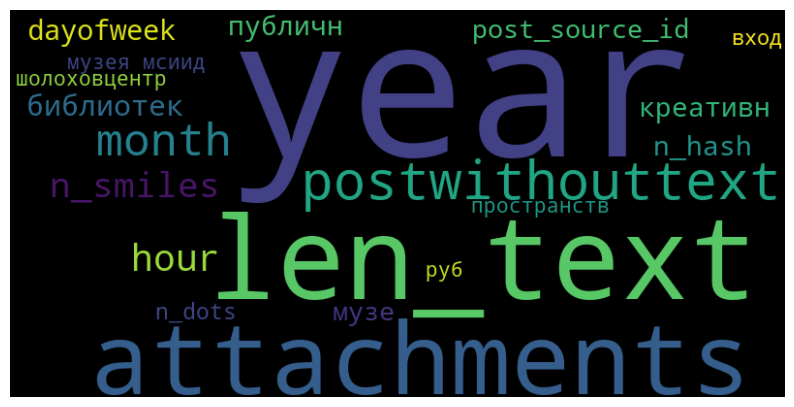

In [193]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Выводы

В данном проекте были подготовдлены датасеты, разработаны и обучены две модели.

Было посчитано количество символов и ключевых слов, на основе чего проведено добавление дополнительных признаков с информацией о тексте. Далее текст был очищен от языковых симфолов.

Далее проведено стреммирование текста с побощью RussianStemmer библиотеки NLTK. Для перевода текста в числовые данные применено TFIDF, для был создан класс StemmedTfidfVectorizer, в процессе чего проведено выделение основ слов - стеммирование и разбиение текста на отдельные слова - токены. Выделелены n-граммы слов от 1 до 5. 

В качетстве целевого признака были просуммированы отнормированные признаки `likes`, `is_pinned`, `comments`, `reposts`, `views`, общий признак был логарифмизирован для получения оъективной оценки.

Разработаны и обучены две модели: LightGBM и  CatBoost. Наилчшее качество показала модель LightGBM. Для опредения качества обучения и сравнения моделей была выбрана метрика R2. Лучшая метрика R2 составляет 0,38 для тестовой выборки. Cat Boost также показала качество, заметно отличающееся от среднего - более чем на 32% на тестовых данных.

По итогу обучения моделей были выделены ТОП 20 всех признаков, наиболее сильно влияющих на популярность поста.